In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
import metrics

In [28]:
data = datasets.fetch_openml('mnist_784', version =1, return_X_y = True)
pixel_values, targets = data


In [4]:
df = pd.read_csv('project_1/input/mnist_train_folds.csv')
df.head()

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x20  28x21  \
0      0    0    0    0    0    0    0    0    0    0  ...      0      0   
1      5    0    0    0    0    0    0    0    0    0  ...      0      0   
2      5    0    0    0    0    0    0    0    0    0  ...      0      0   
3      5    0    0    0    0    0    0    0    0    0  ...      0      0   
4      7    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x22  28x23  28x24  28x25  28x26  28x27  28x28  kfold  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 786 columns]

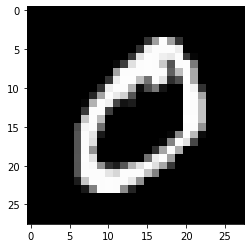

In [29]:
targets = targets.astype(int)
single_image = pixel_values[1,:].reshape(28,28)
plt.imshow(single_image, cmap = 'gray')

In [30]:
tsne = manifold.TSNE(n_components=2, random_state = 42)
transformed_data = tsne.fit_transform(pixel_values[:3000,:])

In [31]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])), columns = ['x','y','targets'])
tsne_df.loc[:,'targets'] = tsne_df.targets.astype(int)

In [32]:
tsne_df.head(10)

x          y  targets
0  -5.281551 -28.952768        5
1 -26.105896 -68.069321        0
2 -42.503582  35.580391        4
3  38.893967  26.663395        1
4 -14.770573  35.433247        9
5  63.997231  -1.102326        2
6  -6.551701   9.943600        1
7  20.086042 -44.003902        3
8  -0.806248  12.682267        1
9  -1.481194  45.506077        4

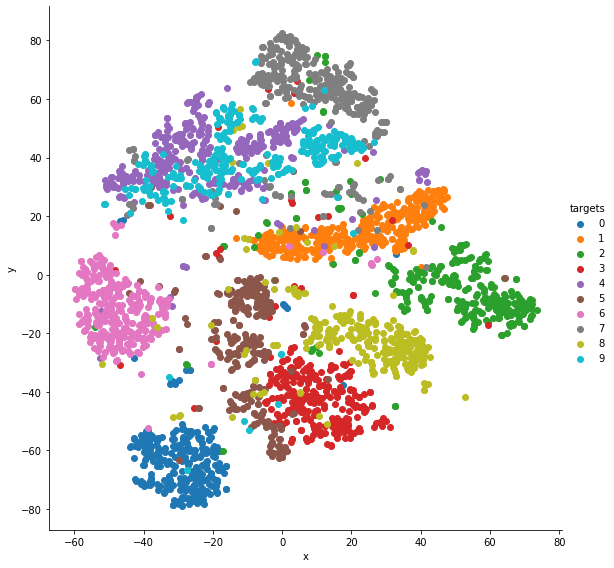

In [33]:
grid = sns.FacetGrid(tsne_df, hue = 'targets', size =8)
grid.map(plt.scatter, 'x','y').add_legend()

In [34]:
df =pd.read_csv('winequality-red.csv')

In [36]:
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [37]:
quality_mapping = {
    3:0,4:1,5:2,6:3,7:4,8:5
}

In [39]:
df.loc[:,'quality'] = df.quality.map(quality_mapping)

In [41]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        2  
1      9.8        2  
2      9.8        2  
3      9.8        3  
4      9.4        2

In [42]:
df = df.sample(frac = 1).reset_index(drop= True)

In [43]:
df_train = df.head(1000)

In [45]:
df_test = df.tail(599)

In [46]:
from sklearn import tree
from sklearn import metrics

In [63]:
clf = tree.DecisionTreeClassifier(max_depth = 7)

In [64]:
cols =list(df.columns)

In [65]:
cols.remove('quality')

In [66]:
cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [67]:
clf.fit(df_train[cols], df_train.quality)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
train_prediction=clf.predict(df_train[cols])

In [69]:
test_prediction = clf.predict(df_test[cols])

In [70]:
train_accuracy = metrics.accuracy_score(df_train.quality, train_prediction)
train_accuracy

0.781

In [71]:
test_accuracy=metrics.accuracy_score(df_test.quality, test_prediction)
test_accuracy


0.6043405676126878

In [93]:
import matplotlib

import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=20)


In [94]:
matplotlib.rc('ytick',labelsize = 20)


In [95]:
%matplotlib inline

In [96]:
train_accuracies = [0.5]
test_accuracies = [0.5]
for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    clf.fit(df_train[cols], df_train.quality)
    train_prediction = clf.predict(df_train[cols])
    test_prediction = clf.predict(df_test[cols])
    train_accuracy = metrics.accuracy_score(train_prediction, df_train.quality)
    test_accuracy =metrics.accuracy_score(test_prediction, df_test.quality)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


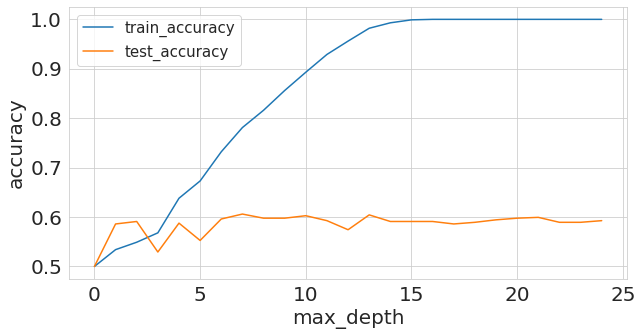

In [98]:
plt.figure(figsize = (10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label = "train_accuracy")
plt.plot(test_accuracies, label = "test_accuracy")
plt.legend(loc= "upper left", prop = {'size':15})
plt.xticks(range(0, 26,5))
plt.xlabel("max_depth", size = 20)
plt.ylabel("accuracy", size = 20)
plt.show()

Text(0, 0.5, 'count')

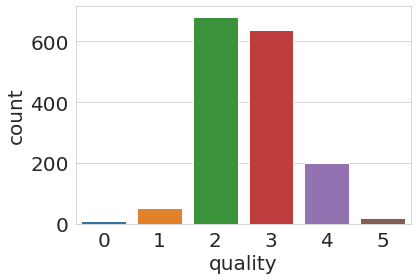

In [101]:
b = sns.countplot(x='quality', data = df)
b.set_xlabel('quality', fontsize = 20)
b.set_ylabel('count', fontsize = 20)

In [15]:
y_true = [0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0]
y_pred = [0.02638412,0.1114267,0.31620708,0.0490937,0.0191491,0.17554844,0.1592202,0.03819563,0.11639273,0.079377,0.0858479,0.39095342,0.27259048,0.03447096,0.04644807,0.03543574,0.18521942,0.05934905,0.61977213,0.33056815]

In [16]:
percisions = []
recalls = []
thresholds = [0.0490937,0.05934905,0.079377,0.0858479,0.1114267,0.11639273,0.15952202,0.17554844,0.18521942,0.27259048,0.31620708,0.33056815,0.3960935342,0.61977213]

In [19]:
i = 0.04909387
tem_predictions = [1 if x>= i else 0 for x in y_pred]
tem_predictions

[0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]

In [13]:
def recall (y_true, y_pred):

    tp = metrics.true_positive(y_true, y_pred)
    fn = metrics.false_negative(y_true, y_pred)
    print(tp)
    print(fn)
    recall = tp / (tp + fn)
    return recall


In [23]:
import sklearn as sk
for i in thresholds:
    print(i)
    tem_predictions = [1 if x>= i else 0 for x in y_pred]
    p = sk.metrics.precision_score(y_true, tem_predictions)
    r =sk.metrics.recall_score(y_true,tem_predictions)
    percisions.append(p)
    recalls.append(r)

0.0490937
0.05934905
0.079377
0.0858479
0.1114267
0.11639273
0.15952202
0.17554844
0.18521942
0.27259048
0.31620708
0.33056815
0.3960935342
0.61977213


Text(0, 0.5, 'Percision')

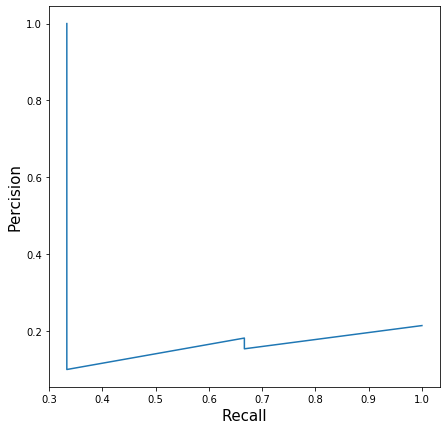

In [25]:
plt.figure(figsize = (7,7))
plt.plot(recalls, percisions)
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Percision', fontsize = 15)

In [6]:
import seaborn as sns
import sklearn as sk

In [8]:

y_true = [0,1,2,0,1,2,0,2,2]
y_pred = [0,2,1,0,2,1,0,0,2]
cm = sk.metrics.confusion_matrix(y_true, y_pred)
plt.figure(figsize = (10,10))


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [9]:
cmap = sns.cubehelix_palette(50,hue =0.05, rot = 0, light = 0.9, dark = 0 , as_cmap=True)

In [10]:
sns.set(font_scale = 2.5)

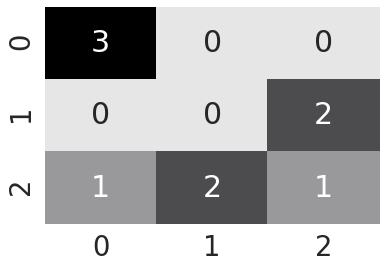

In [11]:
sns.heatmap(cm, annot = True, cmap=cmap, cbar =False)

In [12]:
def pk(y_true, y_pred, k):
    if k ==  0 :
        return 0
    y_pred =y_pred[:k]
    pred_set = set(y_pred)
    true_set = set(y_true)
    common_value = pred_set.intersection(y_true)
    return len(common_value)/len(y_pred[:k])